RETRASO MEDIO=  1.4069


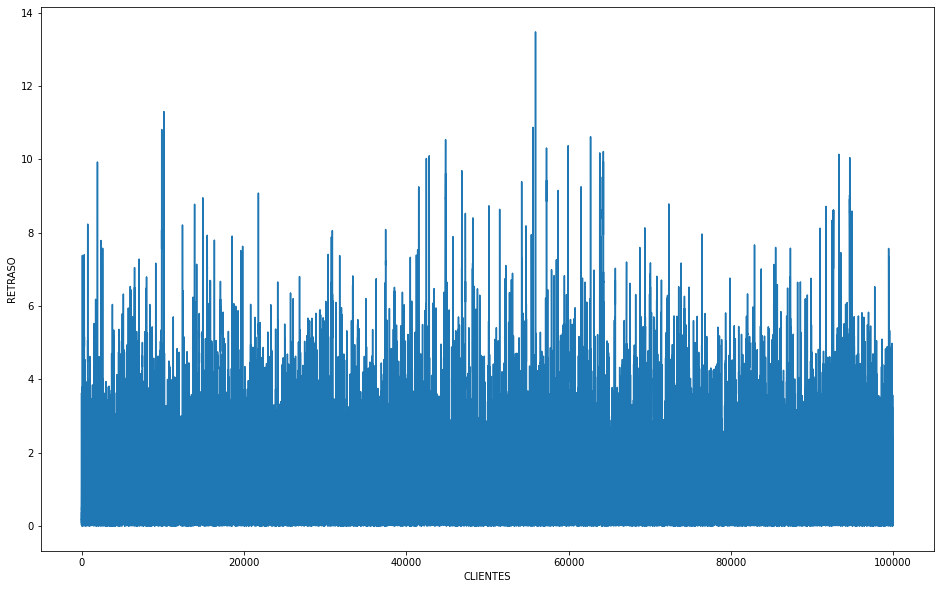

In [7]:
from random import expovariate
from statistics import mean 
from math import inf as Infinity
import matplotlib.pyplot as plt

lamda = 1.3                         #Razón de arrivos (1/λ)
mu = 2.0                            #Razón de salida (1/μ)
T = 100000
count = 0                           #Contador de paquetes simulados
t = 0
N = 0                               #Variable de estado: numero de paquetes en el sistema
tll = expovariate(lamda)            #Tiempo de llegada
ts = Infinity                       #Tiempo de salida
tll_Data = []                       #Lista de tiempos de llegada
ts_Data = []                        #Lista de tiempos de salida
r_Data = []                         #Lista de retrasos individuales

while t < T:
    if tll < ts:                           #Evento de llegada
        t = tll
        tll_Data.append(t)
        N = N + 1.0
        tll = t + expovariate(lamda) 
        if N == 1:
            ts = t + expovariate(mu)
    else:                                         #Evento de salida
        t = ts 
        ts_Data.append(t)
        N = N - 1.0
        count = count + 1                         
        if N > 0:
            ts = t + expovariate(mu)
        else:
            ts = Infinity
            
#Retraso promedio
usuario=0
lista_usuario=[]

for i in range(T):
    d = ts_Data[i] - tll_Data[i]
    r_Data.append(d)
    usuario=usuario+1
    lista_usuario.append(usuario)
    
print( "RETRASO MEDIO= ", round( mean(r_Data), 4) )
plt.figure (figsize= (16,10))
plt.plot(lista_usuario,r_Data)
plt.xlabel("CLIENTES")
plt.ylabel("RETRASO")
plt.show()